In [1]:
from csv import DictReader

with open('data/combustdb_master.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

compounds = [r for r in rows if r['properties.cetane_number.value'] != '-']
print(len(compounds))

408


In [2]:
from alvadescpy import smiles_to_descriptors

descriptors = [smiles_to_descriptors(c['canonical_smiles']) for c in compounds]

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(descriptors)

X = df.values
for i in range(len(X)):
    for j in range(len(X[i])):
        if X[i][j] == 'na':
            X[i][j] = 0.0
X = X.astype('float32')

y = np.array([[float(c['properties.cetane_number.value'])] for c in compounds], dtype='float32')

print(X.shape, y.shape)

(408, 5305) (408, 1)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_norm = scaler.transform(X)
print(X_norm.shape)

(408, 5305)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full', random_state=0)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
print(X_pca.shape)

(408, 408)


In [6]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=30, metric='euclidean', algorithm='brute')
clf.fit(X_pca)
local_outlier_factors = [-1 * of for of in clf.negative_outlier_factor_]
print(len(local_outlier_factors))

408


In [16]:
X_inlier = []
X_outlier = []
y_inlier = []
y_outlier = []

outlier_indices = []

for i in range(len(local_outlier_factors)):
    if local_outlier_factors[i] > 2.0:
        X_outlier.append(X_pca[i])
        y_outlier.append(y[i])
        outlier_indices.append(i)
    else:
        X_inlier.append(X_pca[i])
        y_inlier.append(y[i])

X_inlier = np.array(X_inlier)
X_outlier = np.array(X_outlier)
y_inlier = np.array(y_inlier)
y_outlier = np.array(y_outlier)

print(X_inlier.shape, X_outlier.shape, y_inlier.shape, y_outlier.shape)

(398, 408) (10, 408) (398, 1) (10, 1)


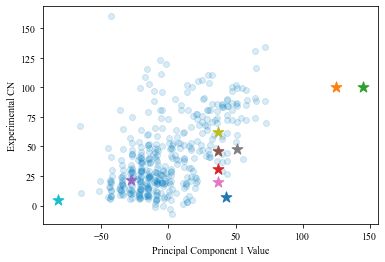

In [17]:
from matplotlib import pyplot as plt
COLORS = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'tab:cyan'
]

PC_INDEX = 0
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 1 Value')
plt.ylabel('Experimental CN')
plt.show()

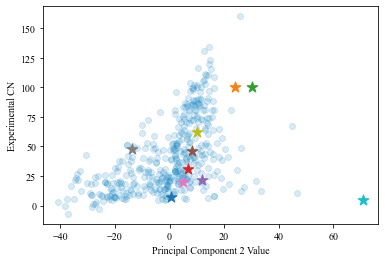

In [18]:
PC_INDEX = 1
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 2 Value')
plt.ylabel('Experimental CN')
plt.show()

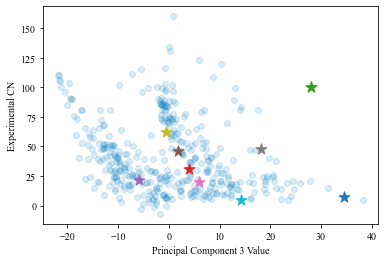

In [19]:
PC_INDEX = 2
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 3 Value')
plt.ylabel('Experimental CN')
plt.show()

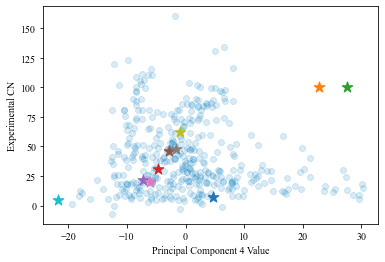

In [20]:
PC_INDEX = 3
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 4 Value')
plt.ylabel('Experimental CN')
plt.show()

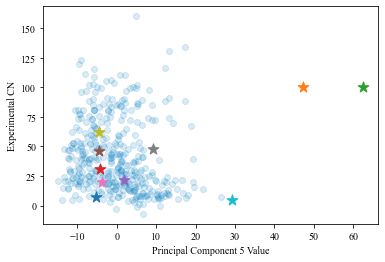

In [21]:
PC_INDEX = 4
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 5 Value')
plt.ylabel('Experimental CN')
plt.show()

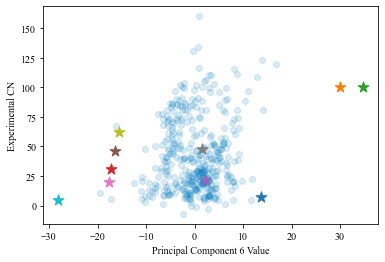

In [22]:
PC_INDEX = 5
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 6 Value')
plt.ylabel('Experimental CN')
plt.show()

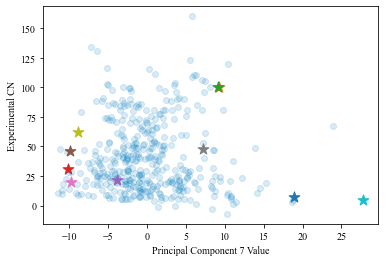

In [23]:
PC_INDEX = 6
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 7 Value')
plt.ylabel('Experimental CN')
plt.show()

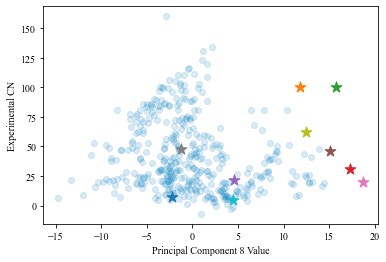

In [24]:
PC_INDEX = 7
pc_i = [x[PC_INDEX] for x in X_inlier]
pc_o = [x[PC_INDEX] for x in X_outlier]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(pc_i, y_inlier, color=(0, 114/235, 178/235), alpha=0.15)
for i in range(len(COLORS)):
    plt.scatter([pc_o[i]], [y_outlier[i]], color=COLORS[i], marker='*', alpha=1.0, s=[128])
plt.xlabel('Principal Component 8 Value')
plt.ylabel('Experimental CN')
plt.show()

In [27]:
outlier_compounds = [compounds[i] for i in outlier_indices]

for comp in outlier_compounds:
    print('{} | {} | {} | {}'.format(comp['cas'], comp['iupac_name'], comp['canonical_smiles'], comp['properties.cetane_number.value']))

60-01-5 | 2,3-di(butanoyloxy)propyl butanoate | CCCC(=O)OCC(COC(=O)CCC)OC(=O)CCC | 7.0
538-24-9 | 2,3-di(dodecanoyloxy)propyl dodecanoate | CCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCC)OC(=O)CCCCCCCCCCC | 100.0
555-45-3 | 2,3-di(tetradecanoyloxy)propyl tetradecanoate | CCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCC | 100.0
8024-22-4 | (9Z,12Z)-octadeca-9,12-dienoic acid | CCCCCC=CCC=CCCCCCCCC(=O)O | 31.0
26856-31-5 | hept-1-yne | CCCCCC#C | 22.0
68412-07-7 | (Z)-octadec-9-enoic acid | CCCCCCCCC=CCCCCCCCC(=O)O | 46.0
68424-45-3 | (9Z,12Z,15Z)-octadeca-9,12,15-trienoic acid | CCC=CCC=CCC=CCCCCCCCC(=O)O | 20.0
68610-82-2 | dihexyl benzene-1,2-dicarboxylate | CCCCCCOC(=O)C1=CC=CC=C1C(=O)OCCCCCC | 48.0
68937-76-8 | octadecanoic acid | CCCCCCCCCCCCCCCCCC(=O)O | 62.0
170082-17-4 | methanol | CO | 5.0
